                                                Final Project
Project Overview: 
The purpose of the project is to investigate the relationship between the Federal Funds rate and the Gross Private Domestic Investment. GPDI is the amount of business expenditures, landlord expenditures, and business inventory changes. It the measure of physical investment used in computing GDP in the measurement of nations' economic activity. This is an important component of GDP because it provides an indicator of the future productive capacity of the economy. If interest rates are low, the presumption is that consumers can borrow more and, consequently, invest more. For instance, lower interest rates on car loans, home mortgages, and credit cards make them more accessible to consumers. This implies an inverse relationship between the two variables and we will use time series data as well as linear regression analysis to test the hypothesis. 

Project Structure:

The project will start by providing data reports of GPDI and US Federal Interest Rate from 1955 to 2020. The data reports will show sources of the data and how to access the data.

The second part of the project will provide summary statistics about GPDI and Federal Interest rate to show the trends of both figures overtime through visualizations. 

The third part of the project will compare the results of the data with the hypothesis. A visualization of the relationship between GPDI and Federal Interest Rate will be generated by merging the two data sets. A linear regression will be performed to test our hypothesis and results. The section will end with a discussion of the results and a conclusion about the relationship. Further research and analysis will also be mentioned if necessary.

Data Report:

The data of the project is collected from the Federal Reserve Economic Data website (FRED). FRED provides seasonally adjusted annual rate on a quarter basis, dating from 1955 to 2020. The data can be accessed at https://fred.stlouisfed.org/series/GPDI and https://fred.stlouisfed.org/series/DFF. 

Key Variables:

The two key variables of the projects are Gross Private Domestic Investments and Federal Fund Rate. GPDI is defined by “Gross private domestic investment is the measure of physical investment used in computing GDP in the measurement of nations' economic activity. This is an important component of GDP because it provides an indicator of the future productive capacity of the economy. It includes replacement purchases plus net additions to capital assets plus investments in inventories.” Federal Fund Rate is “the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity.” 


In [4]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [10]:
#Access Data
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GPDI&scale=left&cosd=1955-01-01&coed=2020-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-12-03&revision_date=2020-12-03&nd=1947-01-01'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,GPDI
0,1955-01-01,68.702
1,1955-04-01,72.688
2,1955-07-01,74.747
3,1955-10-01,78.882
4,1956-01-01,78.303


In [11]:
data.columns = ["Date", "GPDI"]

In [12]:
data.head()

,Date,GPDI
0,1955-01-01,68.702
1,1955-04-01,72.688
2,1955-07-01,74.747
3,1955-10-01,78.882
4,1956-01-01,78.303


In [13]:
data.tail()

,Date,GPDI
258,2019-07-01,3759.796
259,2019-10-01,3732.637
260,2020-01-01,3675.871
261,2020-04-01,3128.603
262,2020-07-01,3680.252


In [14]:
data.describe()

,GPDI
count,263.000000
mean,1232.533483
std,1109.301763
min,65.065000
25%,197.870000
50%,908.569000
75%,2052.136500
max,3772.798000


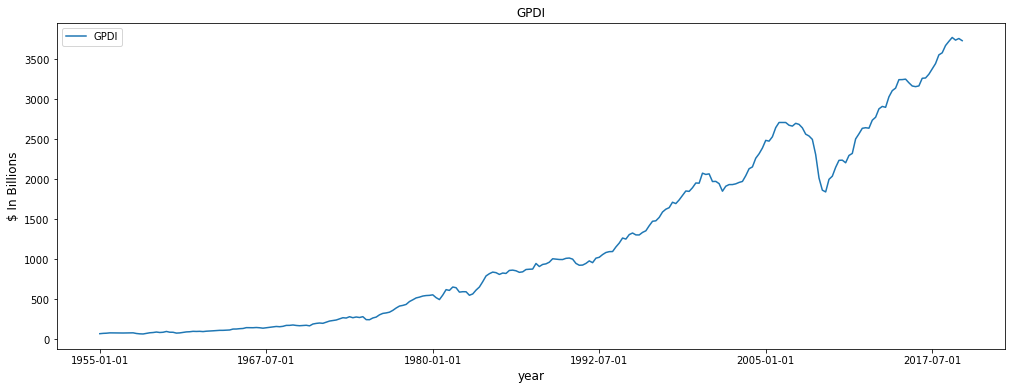

In [15]:
#Graphing the GPDI
GPDI_data=data.set_index('Date')
ax = GPDI_data['1955':'2020'].plot(title="GPDI", legend=True, figsize=(17,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('$ In Billions', fontsize=12)
plt.show()

In [16]:
#Access Data
fed_data = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DFF&scale=left&cosd=1955-01-01&coed=2020-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-12-03&revision_date=2020-12-03&nd=1954-07-01'
data = pd.read_csv(fed_data, parse_dates=True)
data.head()

,DATE,DFF
0,1955-01-01,1.345000
1,1955-04-01,1.501099
2,1955-07-01,1.936522
3,1955-10-01,2.359022
4,1956-01-01,2.482308


In [17]:
data.columns = ["Date", "US Interest Rate"]

In [18]:
data.head()

,Date,US Interest Rate
0,1955-01-01,1.345000
1,1955-04-01,1.501099
2,1955-07-01,1.936522
3,1955-10-01,2.359022
4,1956-01-01,2.482308


In [27]:
data.tail()

,Date,US Interest Rate
258,2019-07-01,2.192174
259,2019-10-01,1.645652
260,2020-01-01,1.254945
261,2020-04-01,0.058791
262,2020-07-01,0.092609


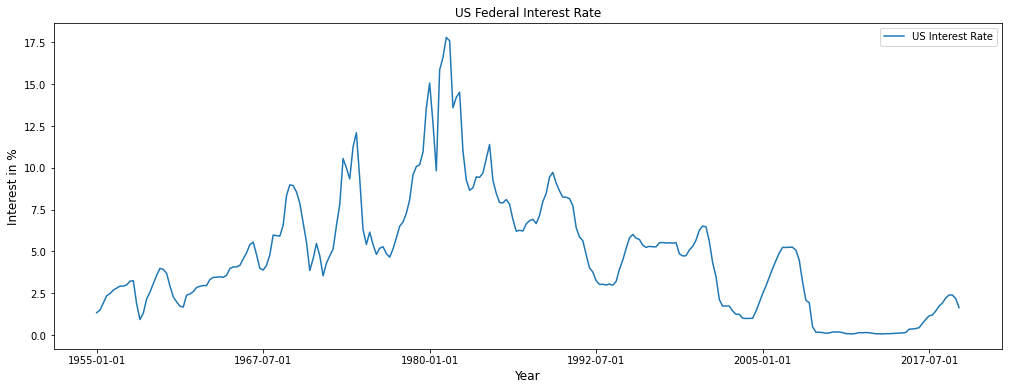

In [19]:
#Graphing the Federal Interest Rate 
interest_rate = data.set_index('Date')
ax = interest_rate['1955':'2020'].plot(title="US Federal Interest Rate", legend=True, figsize=(17,6))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Interest in %', fontsize=12)
plt.show()

In [20]:
#Merged US Interest Rate and GPDI
data_merge=GPDI_data.merge(interest_rate, how='inner', on='Date', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge.fillna(0)

,GPDI,US Interest Rate
Date,,
1955-01-01,68.702,1.345000
1955-04-01,72.688,1.501099
1955-07-01,74.747,1.936522
1955-10-01,78.882,2.359022
1956-01-01,78.303,2.482308
...,...,...
2019-07-01,3759.796,2.192174
2019-10-01,3732.637,1.645652
2020-01-01,3675.871,1.254945


We will then be using a regression analysis to test our hypothesis by following that there is an inverse relationship between the GPDI and the Federal Interest Rate. 

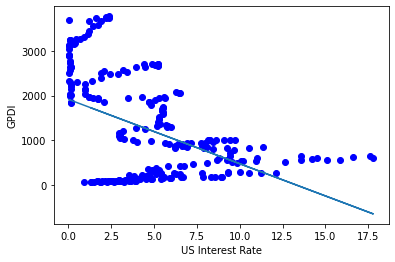

In [21]:
#Graphing Linear regression based on polyfit
from numpy.polynomial.polynomial import polyfit
x = interest_rate['US Interest Rate']
y = GPDI_data['GPDI']
fig,ax=plt.subplots()
ax.plot(x, y, 'bo')
ax.set_xlabel("US Interest Rate")
ax.set_ylabel("GPDI")
b,m = polyfit(x, y ,1)
ax.plot(x, m*x + b)

In [28]:
#Getting information about linear regression based on GPDI and US Interest Rate
from scipy.stats import linregress
gradient, intercept, r_value, p_value, sd_err = linregress(interest_rate['US Interest Rate'], GPDI_data['GPDI'])
gradient, intercept, r_value, p_value, sd_err

(-144.26330043744383,
 1918.1936486568593,
 -0.4660270976447759,
 1.3861782699697477e-15,
 16.953331265324007)

In [23]:
#R-squared value: the strength of the relationship between the dependent and the independent variable
r_value**2

0.21718125573921349

Linear Regression Using scipy.stats and polyfit

At the above graph and code, at the 5% level or 1% level, we can reject the null hypothesis (it does not have a relationship) because the p-value is lower than 0.05, 1.3861782699697477e-15. Thus, we can say that there is a siginificance between GPDI and the Federal Funds Rate or Interest Rate. Our hypothesis is supported through the graph and the stats.

In [24]:
#Set constant and set up the OLS regression model
data_merge['const']= 1
reg = sm.OLS(exog = data_merge[["const", "US Interest Rate"]], endog= data_merge["GPDI"], missing = "drop")
type(reg)

statsmodels.regression.linear_model.OLS

In [25]:
#Fit the regression 
result = reg.fit()
type(result)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [26]:
#Give results of the data
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   GPDI   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     72.41
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.39e-15
Time:                        12:01:52   Log-Likelihood:                -2184.5
No. Observations:                 263   AIC:                             4373.
Df Residuals:                     261   BIC:                             4380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1918.1936    100.843  

Discussion/Conclusion

To reiterate, our hypothesis is that there is an inverse relationship between the GPDI and the Federal Funds Rate/ Federal Interest Rate. Our R^2 is quite weak with it starting at .217.That means our dependent variable GPDI has a lot of variation within it. One explanation could be that there is some ommitted variables that could contribute to a stronger relationship between the two variables. The negative coefficient shown in the US Interest rate, it represents that negative relationship or the inverse relationship between the GPDI and the US Interest Rate. 